# Task 3:Boston_Price_Detection

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# Importing Boston house price dataset

In [2]:
headers = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
           'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


# read the CSV file into a pandas dataframe
data = pd.read_csv('housing.csv',sep='\s+',names= headers)

In [3]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:

#Checking the no. of rows and columns
data.shape

(506, 14)

In [5]:

#Checkling for missing values
data.isnull().sum()
data.fillna(0)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [6]:

#Renaming last columns as price
data.rename(columns = {'MEDV':'Price'},inplace = True)

In [7]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:

#Statistical measures of the dataset
data.describe()
     

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding the correlation between various features in the dataset

Positive Correlation

Negative Correlation

In [9]:

correlation = data.corr()

<AxesSubplot: >

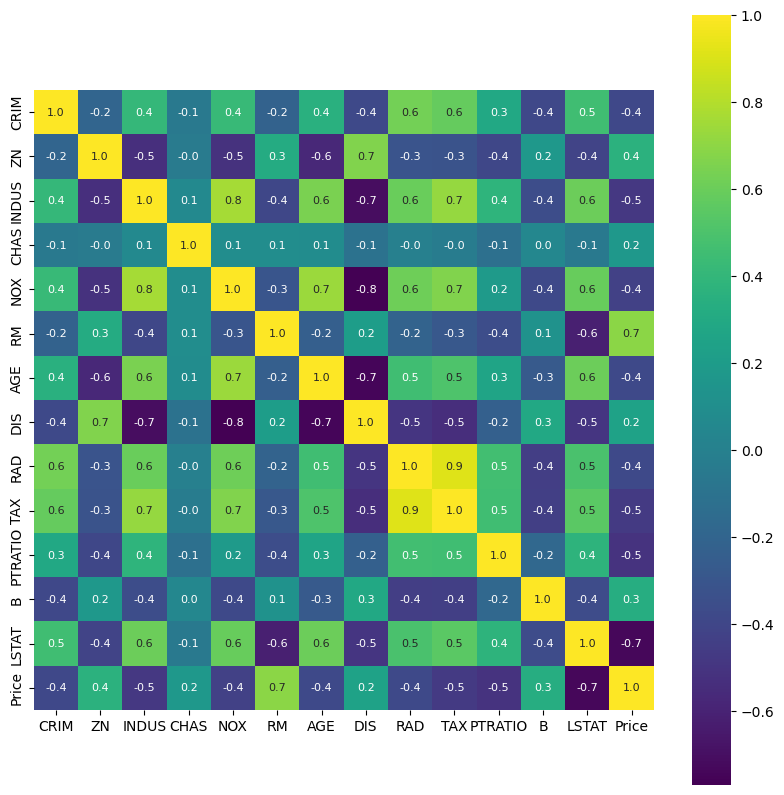

In [14]:

plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt ='.1f',annot =True,
            annot_kws = {'size':8}, cmap = 'viridis')
     

# Splitting the dataset into features and target

In [15]:

X = data.drop(['Price'], axis = 1)
Y = data['Price']

In [16]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [17]:
Y


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

# Splitting the data into training and test data

In [18]:

X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [19]:


print(X.shape , X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


# Model Building

# XGBoost Regressor

In [20]:
 #Loading the model
 model = XGBRegressor()

In [21]:

#Trainin the model with training data
model.fit(X_train, Y_train)
     

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

# Model Evaluation

Prediction on training data

In [22]:

#Accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [23]:
print(training_data_prediction)
     

[23.147501  20.99463   20.090284  34.69053   13.903663  13.510157
 21.998634  15.1940975 10.899711  22.709627  13.832816   5.592794
 29.810236  49.99096   34.89215   20.607384  23.351097  19.23555
 32.695698  19.641418  26.991022   8.401829  46.00729   21.708961
 27.062933  19.321356  19.288303  24.809872  22.61626   31.70493
 18.542515   8.697379  17.395294  23.700663  13.304856  10.492197
 12.688369  25.016556  19.67495   14.902088  24.193798  25.007143
 14.900281  16.995798  15.6009035 12.699232  24.51537   14.999952
 50.00104   17.525454  21.184624  31.998049  15.613355  22.89754
 19.325378  18.717896  23.301125  37.222923  30.09486   33.102703
 21.00072   49.999332  13.405827   5.0280113 16.492886   8.405072
 28.64328   19.499939  20.586452  45.402164  39.79833   33.407326
 19.83506   33.406372  25.271482  50.001534  12.521657  17.457413
 18.61758   22.602625  50.002117  23.801117  23.317268  23.087355
 41.700035  16.119293  31.620516  36.069206   7.0022025 20.3827
 19.996452  11.

In [24]:

# R squared Error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

#Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print('R Squared Error :',score_1)
print('Mean Absolute Error :',score_2)


R Squared Error : 0.9999948236320982
Mean Absolute Error : 0.0145848437110976


# Visualizing the actual prices and predicted prices

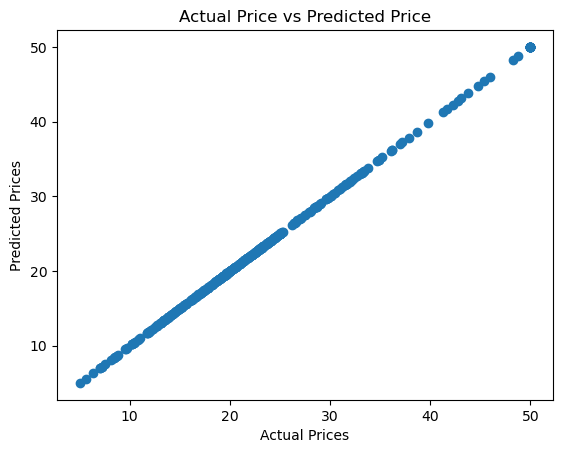

In [25]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs Predicted Price')
plt.show()

# Prediction on Test data

In [26]:
#Accuracy for prediction on test data 
test_data_prediction = model.predict(X_test)

In [27]:
# R squared Error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

#Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print('R Squared Error :',score_1)
print('Mean Absolute Error :',score_2)


R Squared Error : 0.8711660369151691
Mean Absolute Error : 2.2834744154238233
